* [100kg,1000 tones,80 gms,60gms]  -> weights

* 100+1000+80+60 --- > incorrect

* we have to convert all units to same unit or unique format, this is nothing but scaling

### scaling technique

* used to convert raw data into meaningful data
1. Standardizing data
2. Data range
3. Normalizing data
4. Robust scaling


### Standardizing data
* based on columns or labels
* standard format refers to 0 mean and unit variance

In [1]:
import pandas as pd

In [2]:
adv=pd.read_csv("Advertising.csv")

In [3]:
adv

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Density'>

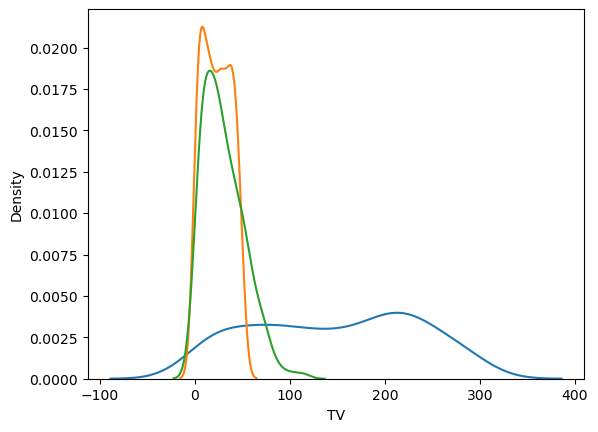

In [7]:
sns.kdeplot(adv["TV"])
sns.kdeplot(adv["radio"])
sns.kdeplot(adv["newspaper"])

In [8]:
adv["TV"][0]

230.1

In [10]:
# Std_data = (x-mean(x))/std(x)

(adv["TV"][0]-adv["TV"].mean())/adv["TV"].std()


0.9674245973763037

In [11]:
from sklearn.preprocessing import scale

In [12]:
scl=scale(adv)  # entire data into standard format
scl

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [13]:
scl_data=pd.DataFrame(scl,columns=adv.columns)
scl_data

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


<AxesSubplot:xlabel='TV', ylabel='Density'>

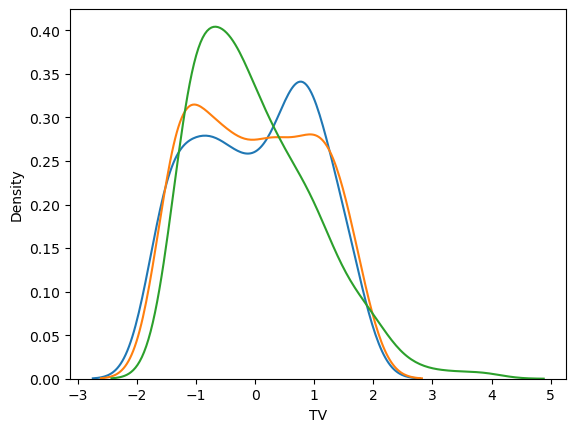

In [14]:
sns.kdeplot(scl_data["TV"])
sns.kdeplot(scl_data["radio"])
sns.kdeplot(scl_data["newspaper"])

In [15]:
adv.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [16]:
adv.std()

TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64

In [17]:
scl_data.mean().round()

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [18]:
scl_data.std().round()

TV           1.0
radio        1.0
newspaper    1.0
sales        1.0
dtype: float64

### Data range 
* column or label or feature
* scaling data by compressing it into a fixed range [0,1]
* MinMaxScaler


In [19]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mnscale=MinMaxScaler().fit_transform(adv)

In [24]:
mnscale.min()

0.0

In [25]:
mnscale.max()

1.0

In [26]:
adv.min()

TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

In [27]:
adv.max()

TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

### Normalizing data
* scaling is done based on individual rows
* L2 normalization applied to particular row of data array
* L2  norm of a row is square root of the sum of the squared values of a particular row

In [28]:
home=pd.read_csv("HomeBuyer.csv")
home

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
from sklearn.preprocessing import Normalizer

In [30]:
nor_data=Normalizer().fit_transform(home)

In [31]:
nor_data.min()

0.0

In [32]:
nor_data.max()

0.9999999807797668

In [33]:
nor_data

array([[9.99999500e-04, 9.99999500e-01, 0.00000000e+00],
       [1.74999732e-03, 9.99998469e-01, 0.00000000e+00],
       [6.04651052e-04, 9.99999817e-01, 0.00000000e+00],
       ...,
       [2.49999218e-03, 9.99996874e-01, 4.99998437e-05],
       [1.09090844e-03, 9.99999405e-01, 0.00000000e+00],
       [1.36110985e-03, 9.99999073e-01, 2.77777520e-05]])

### Robust scaling

* Deals with outlier(data point that is significntly further away from the other data points)
* Robustly scale the data
* scaling by using data's mean and IQR
* Here mean affected but median remains same
* Subtract the median from each data value then scale to IQR

In [34]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
from sklearn.preprocessing import RobustScaler

In [39]:
 rscl=RobustScaler().fit_transform(adv)

In [41]:
rscl_data=pd.DataFrame(rscl,columns=adv.columns)
rscl_data

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594
